In [1]:
import chipwhisperer as cw

In [ ]:
%%bash
cd ../hardware/victims/firmware/simpleserial-aes/
make PLATFORM=CWLITEXMEGA CRYPTO_TARGET=TINYAES128C

In [2]:
scope = cw.scope()
scope.default_setup()

In [3]:
cw.program_target(scope, cw.programmers.XMEGAProgrammer, "../hardware/victims/firmware/simpleserial-aes/simpleserial-aes-CWLITEXMEGA.hex")

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 3895 bytes


In [4]:
target = cw.target(scope)

In [2]:
proj_path = "../projects/CPA_project"

In [6]:
proj = cw.create_project(proj_path)

In [7]:
N_traces = 3000
ktp = cw.ktp.Basic()

key, text = ktp.next()
print(key)

for i in range(N_traces):
    key, text = ktp.next()
    trace = cw.capture_trace(scope, target, text, key)
    if trace is None:
        continue
    proj.traces.append(trace)

proj.save()

CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')


In [3]:
import chipwhisperer.analyzer as cwa
import matplotlib.pylab as plt

proj = cw.open_project(proj_path)

In [5]:
attack = cwa.cpa(proj, cwa.leakage_models.sbox_output)
results = attack.run()
print(results)

Subkey KGuess Correlation
  00    0x2B    0.72523
  01    0x7E    0.66012
  02    0x15    0.76830
  03    0x16    0.73931
  04    0x28    0.66348
  05    0xAE    0.86944
  06    0xD2    0.74701
  07    0xA6    0.74280
  08    0xAB    0.68984
  09    0xF7    0.87348
  10    0x15    0.85580
  11    0x88    0.87113
  12    0x09    0.64965
  13    0xCF    0.76069
  14    0x4F    0.75717
  15    0x3C    0.88683



<IPython.core.display.Javascript object>


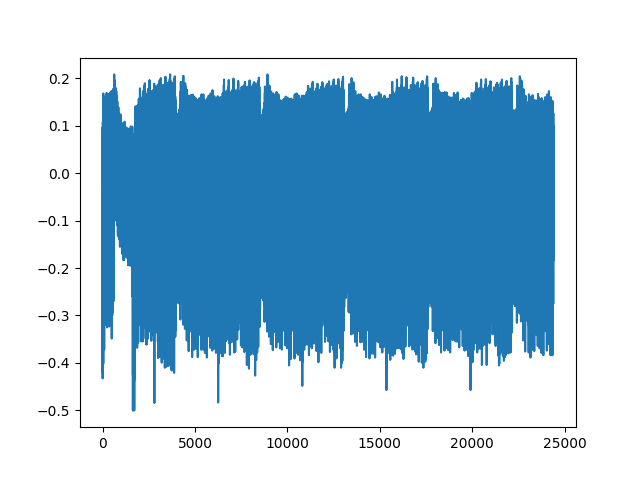

In [6]:
%matplotlib notebook
plt.plot(proj.waves[21])